# Calculating Portfolio Returns with Pandas DataFrames

## 1. Import Libraries and Dependencies

In [11]:
# Import necessary libraries and dependencies
import pandas as pd 
import pathlib as Path 
%matplotlib inline 

## 2. Set the File Path to the CSVs using the Pathlib Library

In [12]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\13-portfolio-returns-01\Resources\MSFT.csv")
sp500_csv_path = (r"C:\Users\minha\OneDrive\Documents\ASU_2022_Bootcamp\Activity_Files\04-Pandas\2\Activities\13-portfolio-returns-01\Resources\SP500.csv")

## 3. Import the CSVs as Pandas DataFrames

In [13]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_csv_path)
msft_df.set_index(pd.to_datetime(msft_df['date'], infer_datetime_format = True), inplace = True)
msft_df.drop(columns = ['date'], inplace = True)

# Read the daily closing prices of SP500, set the `date` as a datetime index
sp500_df = pd.read_csv(sp500_csv_path)
sp500_df.set_index(pd.to_datetime(sp500_df['date'], infer_datetime_format = True), inplace = True)
sp500_df.drop(columns = ['date'], inplace = True)


## 4. Combine the DataFrames and Sort the Index

In [14]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_data_frames = pd.concat([msft_df, sp500_df], axis = 'columns', join = 'inner')

# Sort datetime index in ascending order (past to present)
combined_data_frames.sort_index(ascending = True, inplace = True)

# Display a few rows
combined_data_frames.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop the Extraneous Columns

In [15]:
# Drop extra columns and only leave the close columns and associated values
combined_data_frames.drop(columns = ['volume', 'open', 'high', 'low'], inplace = True)
combined_data_frames.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [16]:
# Rename the columns to match the corresponding stock
combined_data_frames.columns = ['MSFT', 'SP500']
combined_data_frames.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [18]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
daily_returns = combined_data_frames.pct_change()
daily_returns = daily_returns.dropna()
daily_returns

,MSFT,SP500
date,,
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988
2014-05-28,-0.004479,-0.001114
...,...,...
2019-05-13,-0.029733,-0.024131
2019-05-14,0.011188,0.008016
2019-05-15,0.010342,0.005839


## 8. Calculate Daily Portfolio Returns

In [19]:
# Use the `dot` function to multiply the weights by each stock's daily return to get the portfolio daily return
weights = [1/2, 1/2]
weighted_returns = daily_returns.dot(weights)
weighted_returns

date
2014-05-21    0.012501
2014-05-22   -0.001917
2014-05-23    0.002374
2014-05-27    0.003866
2014-05-28   -0.002796
                ...   
2019-05-13   -0.026932
2019-05-14    0.009602
2019-05-15    0.008091
2019-05-16    0.015993
2019-05-17   -0.006254
Length: 1257, dtype: float64

## 9. Plot Daily Portfolio Returns

<AxesSubplot:title={'center':'Daily Portfolio Returns'}, xlabel='date'>

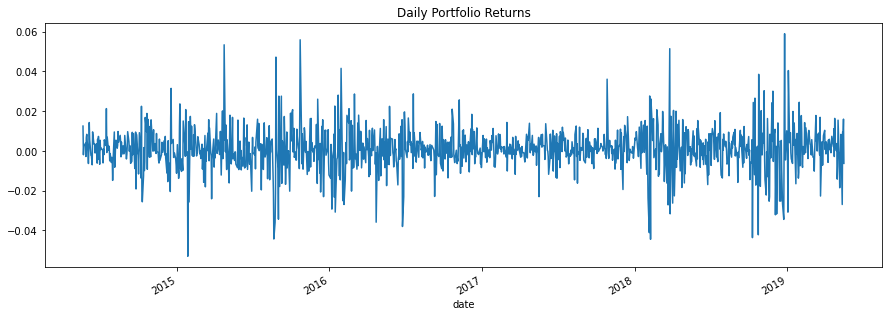

In [20]:
# Use the `plot` function to plot the daily portfolio returns
weighted_returns.plot(title = 'Daily Portfolio Returns', figsize = (15, 5))

## 10. Calculate Cumulative Portfolio Returns

In [21]:
# Use the `cumprod` function to cumulatively multiply each element in the Series by it's preceding element until the end
cumulative_returns = (1 + weighted_returns).cumprod() - 1
cumulative_returns.head()

date
2014-05-21    0.012501
2014-05-22    0.010560
2014-05-23    0.012958
2014-05-27    0.016875
2014-05-28    0.014031
dtype: float64

## 11. Plot Cumulative Portfolio Returns

<AxesSubplot:title={'center':'Cumulative Portfolio Returns'}, xlabel='date'>

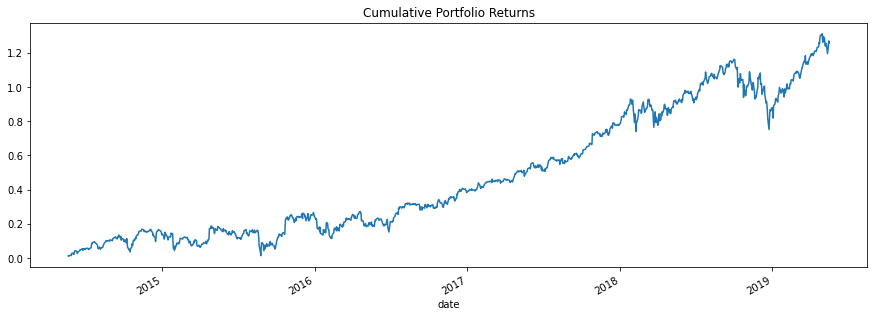

In [22]:
# Use the `plot` function to plot the cumulative portfolio returns
cumulative_returns.plot(title = 'Cumulative Portfolio Returns', figsize = (15, 5))